# HW 3: Application Questions

CS 539 Machine Learning

Aukkawut Ammartayakun

In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## 1. Graphical Model (15 points)

Here, we want to guesstimate what a local weather station will report in 4 consecutive days, starting day 0. The station uses three words, “cold”, ”hot”, and “mild”. We use a directed graph to characterize the report over these 4 days, where variables $X_0, X_1, X_2$, and $X_3$ represent the station report on these 4 days.

$$X_0 \rightarrow X_1 \rightarrow X_2 \rightarrow X_3$$

These variables will get three possible states, $X_0, X_1, X_2, X_3 \in \{\text{‘cold’, ‘hot’, ‘mild’}\}$. We call ‘cold’ state 1 ($S_1$), ‘hot’ state 2 ($S_2$), and ‘mild’ state 3 ($S_3$). Historically, we have learned that the station has a sort of pattern in its reporting of weather; thus, we might have extra information on what the report is for the next day given we know today’s report. The conditional probability of $P(X_k|X_{k-1})$ is defined by the following matrix:

$$P(X_k|X_{k-1}) = \begin{bmatrix}
1/2 & 1/3 & 1/4 \\
1/4 & 1/3 & 1/4 \\
1/4 & 1/3 & 1/2
\end{bmatrix}$$

where, the matrix $(i,j)$ th element defines probability $X_k = S_i$ given $X_{k−1} = S_j$. For example, the probability of $X_k$ to be ‘cold’ given $X_{k-1}$ is ‘cold’ will be 1/2, and the probability of $X_k$ to be ‘mild' given $X_{k-1}$ is ‘hot’ is 1/3. For this problem,

a) Draw 5 samples for the station report over these 4 days. For day zero ($X_0$), consider $P(X_0=\text{’cold’})= P(X_0=\text{’hot’})= P(X_0=\text{’mild’})=1/3$.

In [4]:
def model():
    # first day
    X0 = np.random.choice([0,1,2], p=[1/3,1/3,1/3])
    # second day
    if X0 == 0:
        X1 = np.random.choice([0,1,2], p=[1/2,1/4,1/4])
    elif X0 == 1:
        X1 = np.random.choice([0,1,2], p=[1/3,1/3,1/3])
    else:
        X1 = np.random.choice([0,1,2], p=[1/4,1/4,1/2])
    # third day
    if X1 == 0:
        X2 = np.random.choice([0,1,2], p=[1/2,1/4,1/4])
    elif X1 == 1:
        X2 = np.random.choice([0,1,2], p=[1/3,1/3,1/3])
    else:
        X2 = np.random.choice([0,1,2], p=[1/4,1/4,1/2])
    # fourth day
    if X2 == 0:
        X3 = np.random.choice([0,1,2], p=[1/2,1/4,1/4])
    elif X2 == 1:
        X3 = np.random.choice([0,1,2], p=[1/3,1/3,1/3])
    else:
        X3 = np.random.choice([0,1,2], p=[1/4,1/4,1/2])
    return X0, X1, X2, X3

def generate_data(n=5):
    data = []
    for i in range(n):
        data.append(model())
    return data

generate_data()

[(2, 0, 0, 0), (1, 2, 0, 1), (1, 2, 2, 2), (1, 0, 0, 0), (2, 0, 0, 0)]

b) We were not in the town to check the report for day zero ($X_0$); so, we assume $P(X_0=\text{’cold’})= P(X_0=\text{’hot’})= P(X_0=\text{’mild’})=1/3$. Derive the marginal probabilities for days 0 to 3. In other words, what is the probability of the station to report ‘cold’, ‘hot’, and ‘mild’ per each day.

For the sake of simplicity, we denote 'cold' as 0, 'hot' as 1, and 'mild' as 2. The model is defined as follows:
$$P(X_0,X_1,X_2,X_3) = P(X_0)P(X_1|X_0)P(X_2|X_1)P(X_3|X_2)$$
which means, the marginal probability of day 1 is:
$$
P(X_1) = \begin{cases}
\frac{1}{3}[\frac{1}{2} + \frac{1}{3} + \frac{1}{4}] & X_1 = 0 \\
\frac{1}{3}[\frac{1}{4} + \frac{1}{3} + \frac{1}{4}] & X_1 = 1 \\
\frac{1}{3}[\frac{1}{4} + \frac{1}{3} + \frac{1}{2}] & X_1 = 2
\end{cases}
$$
the marginal probability of day 2 is:
$$
P(X_2) = \begin{cases}
\frac{13}{36}[\frac{1}{2} + \frac{1}{3} + \frac{1}{4}] & X_2 = 0 \\
\frac{5}{18}[\frac{1}{4} + \frac{1}{3} + \frac{1}{4}] & X_2 = 1 \\
\frac{13}{36}[\frac{1}{4} + \frac{1}{3} + \frac{1}{2}] & X_2 = 2
\end{cases}
$$

lastly, the marginal probability of day 3 is:
$$
P(X_3) = \begin{cases}
\frac{169}{432}[\frac{1}{2} + \frac{1}{3} + \frac{1}{4}] & X_3 = 0 \\
\frac{25}{108}[\frac{1}{4} + \frac{1}{3} + \frac{1}{4}] & X_3 = 1 \\
\frac{169}{432}[\frac{1}{4} + \frac{1}{3} + \frac{1}{2}] & X_3 = 2
\end{cases}


c) Someone tells us that they know for sure that the $X_2$ report will be “hot”, what are the conditional probabilities for other days given the $X_2$ report is ‘hot’. 

$P(X_0| X_2 = 1) = P(X_0), P(X_1|X_2 = 1) = P(X_1), P(X_3|X_2 = 1) = \frac{P(X_1,X_2,X_3)}{P(X_0)P(X_1|X_0)P(X_2|X_1)}$

d) What is the most probable report for these four days? 

Maximizing the maginal probability: $X_0$ can be anything, $X_1,X_2,X_3$ are all either mild or cold.

## 2. Graphical Model (15 points)

The weather station is experimenting with a graphical presentation of the 
weather report instead of using “cold”, “hot”, and “mild” words. They have designed a bar display, where the height of the bar is a function of “state”. They also considered adding a bit of variability to the bar hoping that the bar display will be more engaging. Their bar height model is defined by 
$$
p(y_i|s_i) \sim \mathcal{N}(m_i,\sigma^2)
$$
$$m_i = \begin{cases}
-2 & s_i = \text{cold} \\
0 & s_i = \text{mild} \\
2 & s_i = \text{hot}
\end{cases}$$
$$\sigma^2 = 1$$

The below figure shows the graphical model for the bar and state. 

![GM](gm2.png)


a) Draw 5 samples for the bar height over these 4 days. 

In [67]:
def model_2(data = None):
    y = []
    if data == None:
        data = generate_data(n=1)
    for x in data[0]:
        if x == 0:
            #N(-2,1)
            y.append(np.random.normal(-2,1))
        elif x == 1:
            #N(0,1)
            y.append(np.random.normal(0,1))
        else:
            #N(2,1)
            y.append(np.random.normal(2,1))
    return y

def generate_data_2(n=5, data_mod = None):
    data = []
    for i in range(n):
        data.append(model_2(data_mod))
    return data

generate_data_2()

[[-0.5922940857197926,
  0.9975322167719965,
  0.4164582799054244,
  1.5531625505467346],
 [0.23015604215641802,
  -1.7391880010334693,
  1.2094795272843561,
  0.24838406347086606],
 [-2.6996049651605745,
  2.202282777304459,
  -1.5108705014759811,
  -2.0539957423386945],
 [2.674838945913078,
  1.671468591771665,
  -3.0848821393955514,
  -4.207652522690676],
 [1.5532226148868564, 3.6674173843758866, 2.9010072257434, 0.9538832185924415]]

b) Draw 5 samples for the bar display when $X_0=\text{’hot’}, X_1=\text{’mild’}, X_2=\text{’cold’}, X_3=\text{’cold’}$. 

In [68]:
generate_data_2(n = 5, data_mod = [(2,1,0,0)])

[[1.6965630083078813,
  0.5242698479997097,
  -1.1347855823874933,
  -2.624927035729442],
 [1.056259207391813,
  -0.9736276759080493,
  -0.5675912773189324,
  -0.9243426704082807],
 [1.9939467101370894,
  1.1493424478860519,
  -2.378976742272183,
  -0.9976864828251975],
 [1.6988126382878173,
  0.5085264321099828,
  -1.786583085921988,
  -1.3057466006950347],
 [2.7105250622701806,
  2.277239707182213,
  -2.798568452104563,
  -1.8817601921544032]]

c) Let’s assume, we observed $Y_0=0.7, Y_1=1.5, Y_2=-1.8, Y_3=-1$. What are marginal distribution of $P(X_k| 
Y_0=0.7, Y_1=1.5, Y_2=-1.8, Y_3=-1),\;k=0,1,2,3$. 

## 3. Gaussian Mixture Model (15 points)

We will use the `gmm_data.xlsx` dataset for this problem (GMM).  


a) Visualize the dataset; and discuss what would you suggest for the number of clusters in the data. 

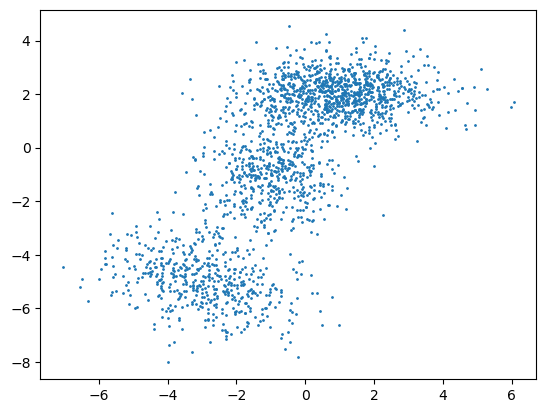

In [9]:
#read data
gmm_data = pd.read_excel('gmm_data.xlsx')
#scatter plot of Var1 and Var2
plt.scatter(gmm_data['Var1'], gmm_data['Var2'], s=1)

The plot suggests that we should have $K = 3$ clusters.

b) Fit a 2-D normal distribution on the data and show your result over the scatter plot of your data 
points.

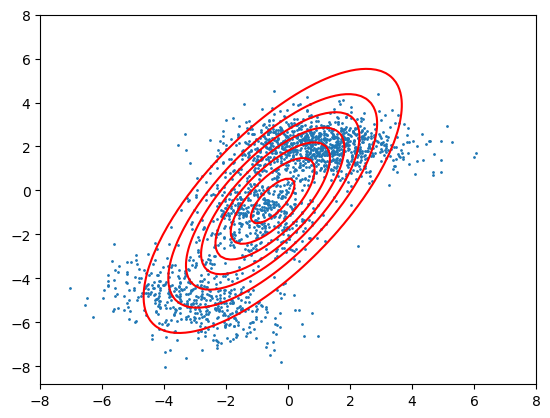

In [14]:
# fit a multivariate normal distribution to the data
mu = np.mean(gmm_data, axis=0) #MLE of mean
sigma = np.cov(gmm_data, rowvar=False) #MLE of covariance matrix
rv = stats.multivariate_normal(mu, sigma)

#plot contour over the scatter plot
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
plt.contour(X, Y, rv.pdf(pos), colors='r')
plt.scatter(gmm_data['Var1'], gmm_data['Var2'], s=1)
plt.show()

c) Fit GMM with K=2 to the data and show your result over the scatter plot of the data points. Repeat 
this with different initialization and discuss your results. 

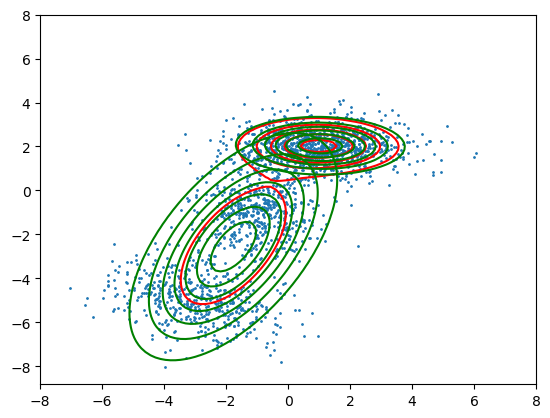

In [49]:
class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=100, tol=1e-3):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.means = None
        self.covariances = None
        self.coef = None

    def fit(self, X):
        # Initialize means, covariances, and mixing coefficients randomly
        n_samples, n_features = X.shape
        self.means = np.random.randn(self.n_components, n_features)
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        self.coef = np.ones(self.n_components) / self.n_components

        for iteration in range(self.max_iter):
            # E-Step
            responsibilities = self._compute_responsibilities(X)

            # M-Step
            N_k = np.sum(responsibilities, axis=0)
            self.means = np.dot(responsibilities.T, X) / N_k[:, np.newaxis]
            self.covariances = np.zeros((self.n_components, n_features, n_features))
            for k in range(self.n_components):
                diff = X - self.means[k]
                self.covariances[k] = np.dot(responsibilities[:, k] * diff.T, diff) / N_k[k]
            self.coef = N_k / n_samples

            # Check for convergence
            log_likelihood = self._compute_log_likelihood(X)
            if iteration > 0 and np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood

    def _compute_responsibilities(self, X):
        # Compute the responsibilities of each component for each data point
        probabilities = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            probabilities[:, k] = self.coef[k] * stats.multivariate_normal.pdf(X, self.means[k], self.covariances[k])
        return probabilities / np.sum(probabilities, axis=1, keepdims=True)

    def _compute_log_likelihood(self, X):
        # Compute the log-likelihood of the data under the current model parameters
        log_likelihood = 0
        for k in range(self.n_components):
            log_likelihood += self.coef[k] * stats.multivariate_normal.pdf(X, self.means[k], self.covariances[k])
        return np.sum(np.log(log_likelihood))
    
# fit GMM
gmm = GaussianMixtureModel(n_components=2)
gmm.fit(gmm_data.values)

#plot contour over the scatter plot
mean = gmm.means
cov = gmm.covariances
coef = gmm.coef
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
plt.contour(X,Y, coef[0]*stats.multivariate_normal.pdf(pos, mean[0], cov[0]) + coef[1]* stats.multivariate_normal.pdf(pos, mean[1], cov[1]), colors='r')
plt.contour(X, Y, stats.multivariate_normal.pdf(pos, mean[0], cov[0]), colors='g')
plt.contour(X, Y, stats.multivariate_normal.pdf(pos, mean[1], cov[1]), colors='g')
plt.scatter(gmm_data['Var1'], gmm_data['Var2'], s=1)
plt.show()


c) Repeat part b with $K=3$. 

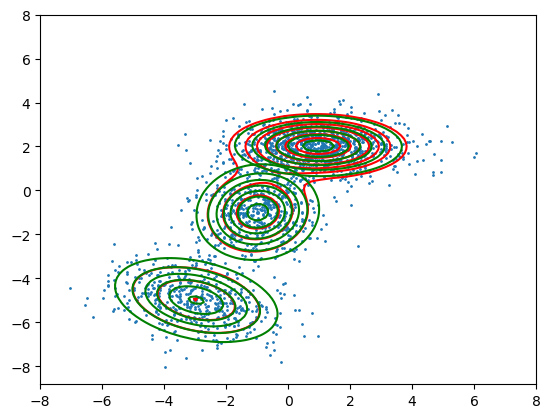

In [47]:
gmm = GaussianMixtureModel(n_components=3)
gmm.fit(gmm_data.values)
#plot contour over the scatter plot
mean = gmm.means
cov = gmm.covariances
coef = gmm.coef
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
#plot contour
plt.contour(X, Y, coef[0]*stats.multivariate_normal.pdf(pos, mean[0], cov[0]) + coef[1]*stats.multivariate_normal.pdf(pos, mean[1], cov[1]) + coef[2]*stats.multivariate_normal.pdf(pos, mean[2], cov[2]), colors='r')
#green contour for separate components
plt.contour(X, Y, stats.multivariate_normal.pdf(pos, mean[0], cov[0]), colors='g')
plt.contour(X, Y, stats.multivariate_normal.pdf(pos, mean[1], cov[1]), colors='g')
plt.contour(X, Y, stats.multivariate_normal.pdf(pos, mean[2], cov[2]), colors='g')
plt.scatter(gmm_data['Var1'], gmm_data['Var2'], s=1)
plt.show()


d) For theoretical question 5, we derived the GMM solution with a common covariance matrix for 
mixtures. Run this solution on the dataset with $K=2$ and $K=3$, and show your result. 

## 4. Poisson Mixture Model (15 points)

We will use the `poisson_data.xlsx` dataset for this problem.  
Poisson distribution is a discrete distribution with a rate parameter ($\lambda$), where the probability of random variable $x$ to be $m$ is defined by 
$$
p(x = m) = \frac{\lambda^m e^{-\lambda}}{m!}
$$
In many datasets, we may observe a mixture of Poisson distributions (I have attached a pdf file showing this form of data in DNA sequencing). We can build a Poisson mixture model similar to what we did for the Gaussian mixture model. The model is defined by
$$
p(x = m) = \sum_{k=1}^K \pi_k \frac{\lambda_k^m e^{-\lambda_k}}{m!}
$$
For the poisson_data.xlsx, we want to fit a Poisson mixture model with $K=2$. 

a) Plot the histogram of the data and discuss your observation. You might compare the histogram 
with the histogram of Poisson distribution.

/Users/aukkawut/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


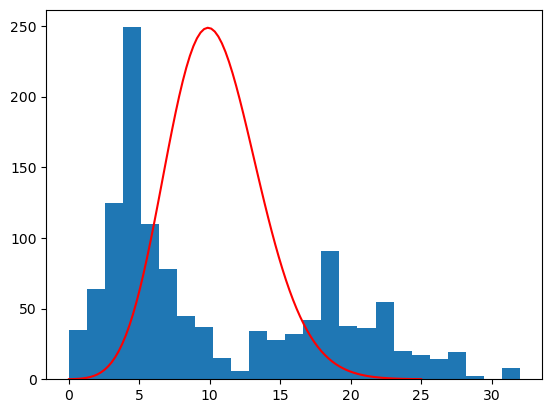

In [38]:
#plot histogram
pmm_data = pd.read_excel('poisson_data.xlsx')
plt.hist(pmm_data, bins=25)
#plot histogram of poisson distribution
mean_pmm = np.mean(pmm_data)
x = np.linspace(0, 25, 100)
plt.plot(x, stats.poisson.pmf(x, mean_pmm)*2000, 'r')
plt.show()


b) Fit a Poisson distribution to the data and compare its pmf with the histogram you derived in part (a).  

Done in part a), MLE of rate is its empirical mean

c) Derive the update rule for the mixture model (EM).

In a similar manner to the gaussian mixture model, we have to evaluate the 
$$
\theta_{\text{new}} = \arg \max_{\theta} Q(\theta, \theta_{\text{old}})
$$

In this case, one can see that

$$
Q(\theta, \theta_{\text{old}}) = \sum_{i=1}^N \sum_{k=1}^K \gamma_{ik} \ln \pi_k + x_i \ln \lambda_k - \lambda_k - \ln x_i!
$$

Take derivative with respect to $\pi_k$ and $\lambda_k$ and set to zero, we get

$$\pi_k = \frac{1}{n}\sum_{i=1}^N \gamma_{ik}$$

and

$$\lambda_k = \frac{n\sum_{i=1}^N \gamma_{ik}x_i}{\sum_{i=1}^N \gamma_{ik}}$$

d) Apply the EM algorithm to the data with $K=2$ and plot the model pmf with the histogram of the 
data. 

In [55]:
class PoissonMixtureModel:
    def __init__(self, n_components, max_iter=100, tol=1e-3):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.means = None
        self.coef = None

    def fit(self, X):
        # Initialize means and mixing coefficients randomly
        n_samples = X.shape[0]
        self.means = np.random.uniform(low=0, high=1, size=self.n_components)
        self.coef = np.ones(self.n_components) / self.n_components

        for iteration in range(self.max_iter):
            # E-Step
            responsibilities = self._compute_responsibilities(X)

            # M-Step
            self.means = np.sum(responsibilities * X[:, np.newaxis], axis=0) / np.sum(responsibilities, axis=0)
            self.coef = np.mean(responsibilities, axis=0)

            # Check for convergence
            log_likelihood = self._compute_log_likelihood(X)
            if iteration > 0 and np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood

    def _compute_responsibilities(self, X):
        # Compute the responsibilities of each component for each data point
        probabilities = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            probabilities[:, k] = self.coef[k] * stats.poisson.pmf(X, self.means[k])
        return probabilities / np.sum(probabilities, axis=1, keepdims=True)

    def _compute_log_likelihood(self, X):
        # Compute the log-likelihood of the data under the current model parameters
        log_likelihood = 0
        for k in range(self.n_components):
            log_likelihood += self.coef[k] * np.sum(np.log(stats.poisson.pmf(X, self.means[k])))
        return log_likelihood

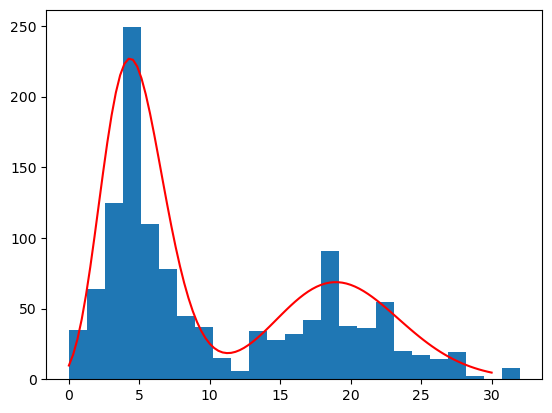

In [62]:
pmm = PoissonMixtureModel(n_components=2)
pmm.fit(pmm_data.values.flatten())
mean = pmm.means
coef = pmm.coef
#plot histogram of poisson distribution
#density = coef[0]*stats.poisson.pmf(x, mean[0]) + coef[1]*stats.poisson.pmf(x, mean[1])
x = np.linspace(0, 30, 100)
plt.plot(x, coef[0]*stats.poisson.pmf(x, mean[0])*2000 + coef[1]*stats.poisson.pmf(x, mean[1])*2000, 'r')
plt.hist(pmm_data, bins=25)
plt.show()

e) Bonus point: discuss model evidence for the models in parts (b) and (d). 

The model evidence in part (d) would be explained as

$$
p(x_n = m|\lambda) = \sum_{k=1}^K \pi_k \mathbb{I}_{k}(z)\frac{\lambda_k^m e^{-\lambda_k}}{m!}
$$
for the indicator function $\mathbb{I}_k(z)$

In a similar sense, the model evidence for the Poisson distribution in part (b) would be only the realized value, i.e., just a pdf with the mean at the empirical mean (MLE).